# Histogram equalization

"*This method usually increases the global contrast of many images, especially when the image is represented by a narrow range of intensity values. Through this adjustment, the intensities can be better distributed on the histogram utilizing the full range of intensities evenly. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the highly populated intensity values which are used to degrade image contrast.*"

In [39]:
%pip install opencv.python

## My approach


### 1. With opencv

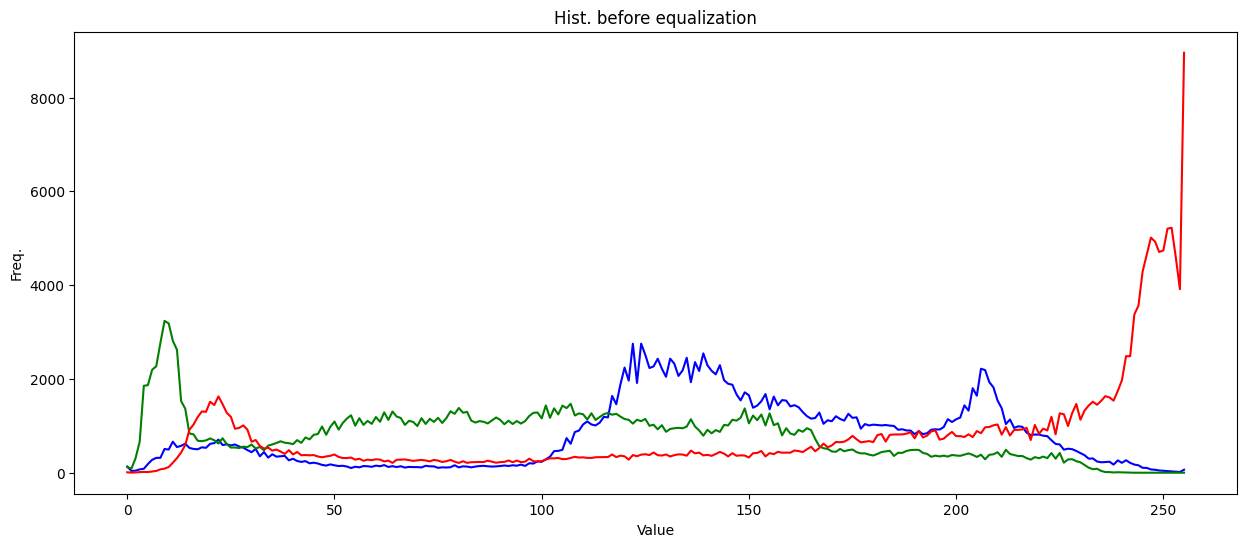

In [51]:
import cv2 as cv
import matplotlib.pyplot as plt

og_im = cv.imread(".res/RGB_paint_splash.jpg")

colors = ('b', 'g', 'r')
hists = []

# getting and plotting data
plt.figure(figsize=(15,6))
plt.title("Hist. before equalization")
plt.xlabel("Value")
plt.ylabel("Freq.")
for i, color in enumerate(colors):
    hist = cv.calcHist([og_im],[i],None,[256],[0,256]) 
    hists.append(hist)
    plt.plot(hist, color=color, label=color)

Text(0, 0.5, 'H(px)')

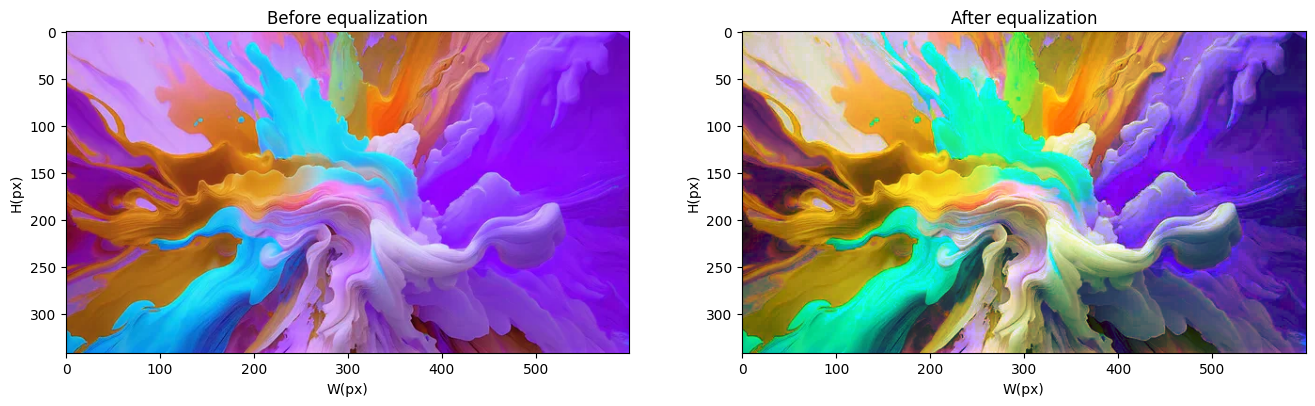

In [65]:
eq_im = og_im.copy()

for chan in range(eq_im.shape[2]):
    eq_im[:,:,chan] = cv.equalizeHist(eq_im[:,:,chan])
    
fig, (im1, im2) = plt.subplots(1, 2, figsize=(16,10))
im1.imshow(og_im, label="Original")
im2.imshow(eq_im, label="Equalized")

im1.set_title("Before equalization")
im2.set_title("After equalization")

im1.set_xlabel("W(px)")
im1.set_ylabel("H(px)")

im2.set_xlabel("W(px)")
im2.set_ylabel("H(px)")


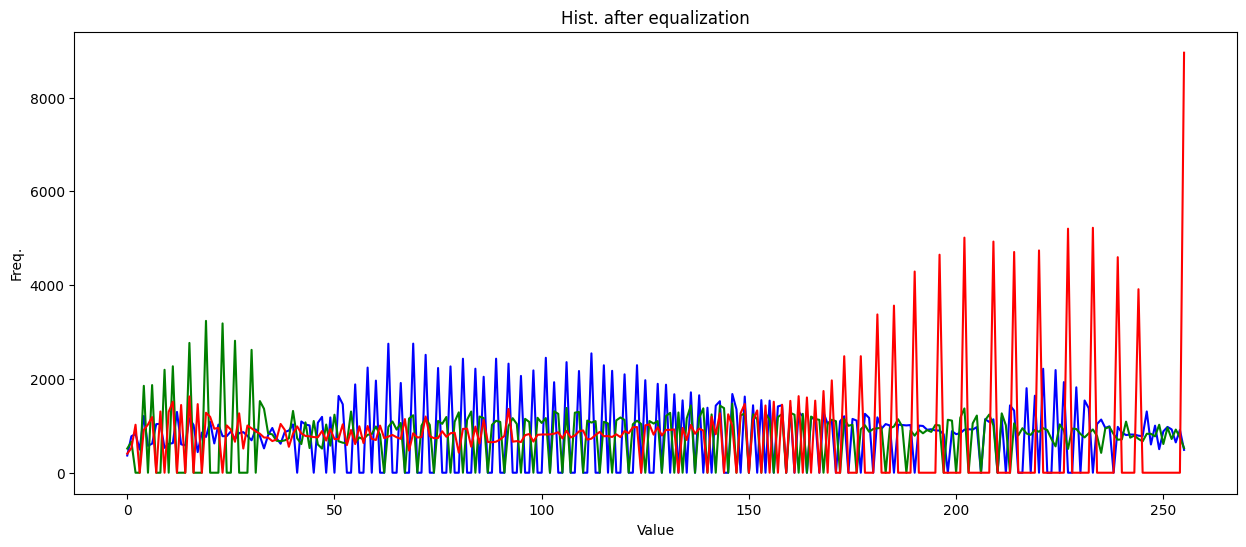

In [50]:
plt.figure(figsize=(15,6))
plt.title("Hist. after equalization")
plt.xlabel("Value")
plt.ylabel("Freq.")
for i, color in enumerate(colors):
    plt.plot(cv.calcHist([eq_im],[i],None,[256],[0,256]) , color=color, label=color)